<a href="https://colab.research.google.com/github/ananyasingh7/deep-learning-projects/blob/main/EuroStat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [3]:
# Import necessary libraries
import requests  # For downloading the dataset
import zipfile  # For extracting the zip file
import os  # For handling file paths and directories
from pathlib import Path  # For cross-platform path handling

# Define the URL for the EuroSAT RGB dataset
url = "http://madm.dfki.de/files/sentinel/EuroSAT.zip"

# Define the folder where you want to save and extract the dataset
save_dir = Path("eurosat")  # Creates a folder named 'eurosat' in your current directory
save_dir.mkdir(exist_ok=True)  # Create the folder if it doesn't exist

# Define the path for the downloaded zip file
zip_path = save_dir / "EuroSAT.zip"

# Step 1: Download the dataset
print("Downloading EuroSAT dataset...")
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(zip_path, 'wb') as f:
        f.write(response.content)
    print(f"Dataset downloaded to {zip_path}")
else:
    print("Error downloading the dataset. Check the URL or your internet connection.")
    exit()

# Step 2: Extract the dataset
print("Extracting EuroSAT dataset...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(save_dir)
print(f"Dataset extracted to {save_dir}")

# Step 3: Verify the folder structure
dataset_path = save_dir / "2750"  # EuroSAT extracts to a folder named '2750'
if dataset_path.exists():
    print(f"Dataset is ready at {dataset_path}")
    print("Folder structure:")
    for folder in dataset_path.iterdir():
        if folder.is_dir():
            num_images = len(list(folder.glob("*.jpg")))
            print(f"  {folder.name}: {num_images} images")
else:
    print("Extraction failed or unexpected folder structure. Check the extracted files.")

Dataset downloaded to eurosat/EuroSAT.zip
Extracting EuroSAT dataset...
Dataset extracted to eurosat
Dataset is ready at eurosat/2750
Folder structure:
  Industrial: 2500 images
  HerbaceousVegetation: 3000 images
  Residential: 3000 images
  Highway: 2500 images
  Forest: 3000 images
  SeaLake: 3000 images
  Pasture: 2000 images
  River: 2500 images
  AnnualCrop: 3000 images
  PermanentCrop: 2500 images


In [4]:
path = Path('eurosat/2750')
path.ls()

(#10) [Path('eurosat/2750/Industrial'),Path('eurosat/2750/HerbaceousVegetation'),Path('eurosat/2750/Residential'),Path('eurosat/2750/Highway'),Path('eurosat/2750/Forest'),Path('eurosat/2750/SeaLake'),Path('eurosat/2750/Pasture'),Path('eurosat/2750/River'),Path('eurosat/2750/AnnualCrop'),Path('eurosat/2750/PermanentCrop')]

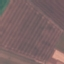

In [5]:
from PIL import Image
display(Image.open(path/'AnnualCrop/AnnualCrop_21.jpg'))

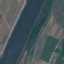

In [6]:
display(Image.open(path/'River/River_1.jpg'))

In [7]:
# create a datablock for image classification
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # input: images, output: categories
    get_items=get_image_files, # get all .jpg files in subfolders
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # 80% train, 20% valid
    get_y=parent_label, # get label from parent folder name
    item_tfms=Resize(128) # resize images to 224x224 for model
)

In [8]:
dls = dblock.dataloaders(path, bs=64)

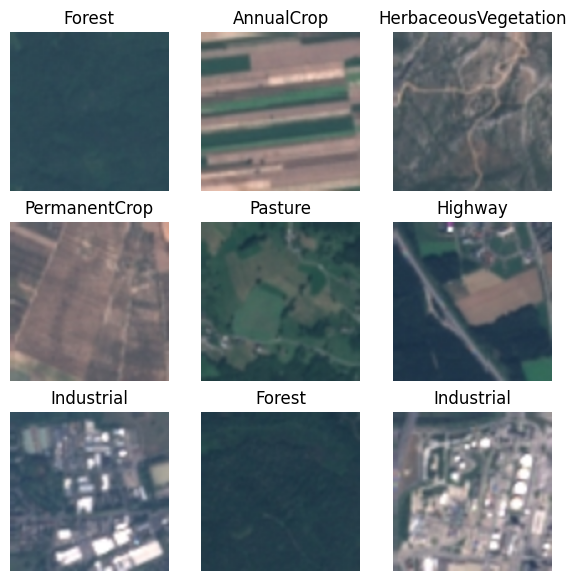

In [9]:
dls.show_batch(max_n=9, figsize=(7,7))

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 152MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.457527,0.281127,0.087037,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.146444,0.084384,0.027778,00:50


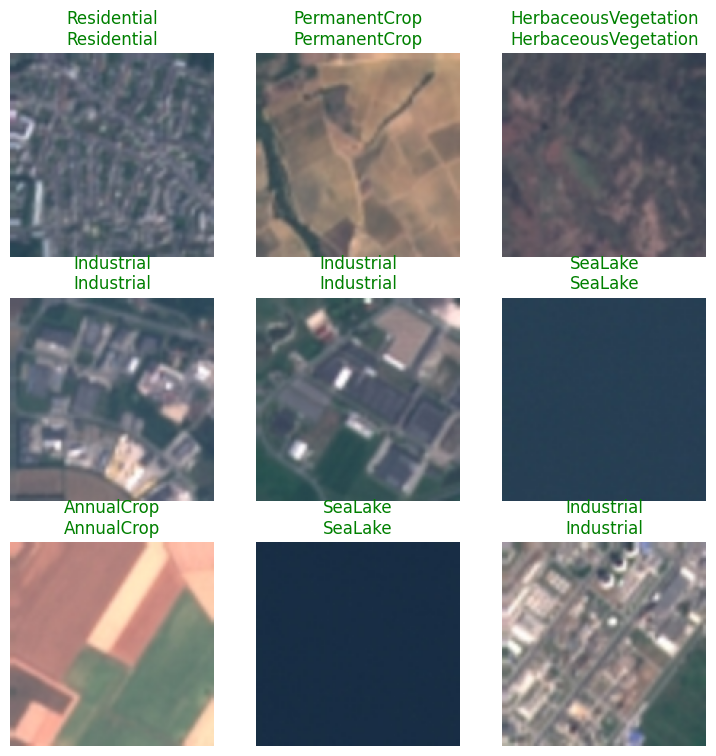

In [10]:
learn.show_results()

In [13]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.100196,0.108983,0.031667,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.140441,0.137061,0.042037,00:52
1,0.058319,0.075569,0.023704,00:51
2,0.018321,0.070023,0.021296,00:51


In [16]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.015765,0.109036,0.024630,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.045596,0.140838,0.032222,00:51
1,0.083084,0.119898,0.031296,00:51
2,0.036427,0.086068,0.022963,00:50
3,0.010697,0.080303,0.020556,00:51
4,0.008238,0.077525,0.020185,00:51


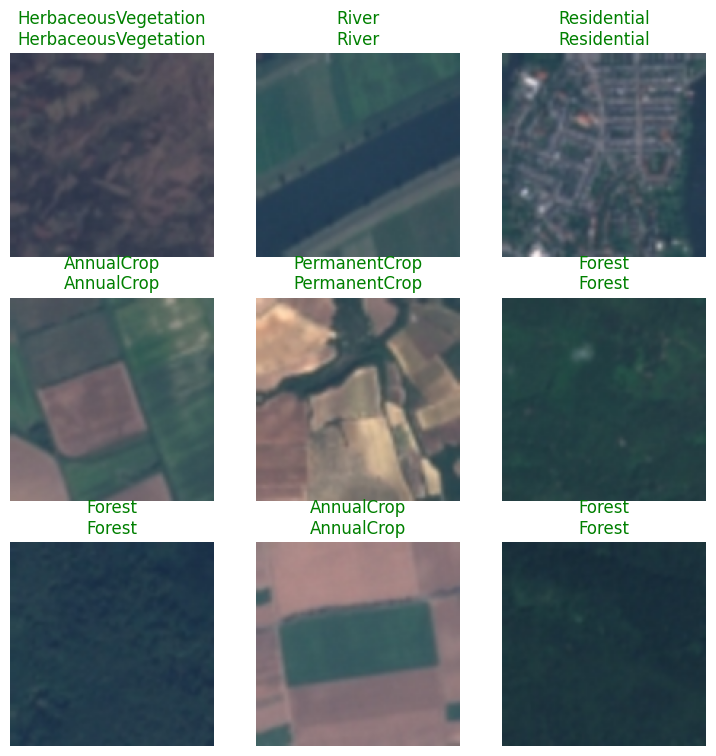

In [17]:
learn.show_results()

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

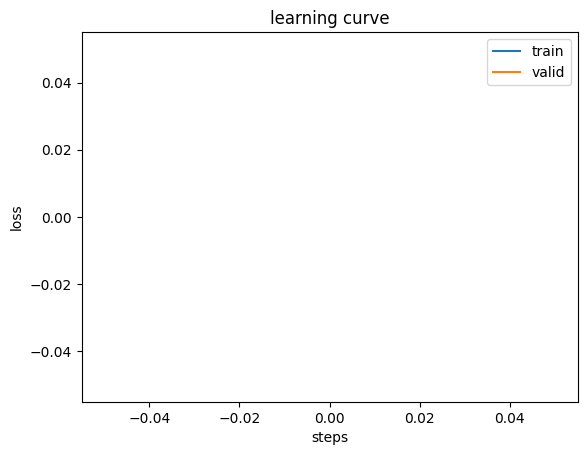

In [18]:
learn.recorder.plot_loss()

In [19]:
'''
Now that you have a DataBlock and dataloaders (dls), you can build a Learner and fine-tune a model:

Create a Learner: Use vision_learner(dls, resnet18, metrics=accuracy) to create a learner with a pretrained ResNet18 model and track accuracy.
Find Learning Rate: Use learn.lr_find() to find a good learning rate.
Fine-Tune: Run learn.fine_tune(epochs) (e.g., 4 epochs) to train the model.
Evaluate: Use learn.show_results() or a confusion matrix (ClassificationInterpretation) to check performance.
Experiment: Try different models (e.g., ResNet34), learning rates, or augmentations (e.g., add batch_tfms=aug_transforms() to the DataBlock).
'''

'\nNow that you have a DataBlock and dataloaders (dls), you can build a Learner and fine-tune a model:\n\nCreate a Learner: Use vision_learner(dls, resnet18, metrics=accuracy) to create a learner with a pretrained ResNet18 model and track accuracy.\nFind Learning Rate: Use learn.lr_find() to find a good learning rate.\nFine-Tune: Run learn.fine_tune(epochs) (e.g., 4 epochs) to train the model.\nEvaluate: Use learn.show_results() or a confusion matrix (ClassificationInterpretation) to check performance.\nExperiment: Try different models (e.g., ResNet34), learning rates, or augmentations (e.g., add batch_tfms=aug_transforms() to the DataBlock).\n'

SuggestedLRs(valley=0.0006918309954926372)

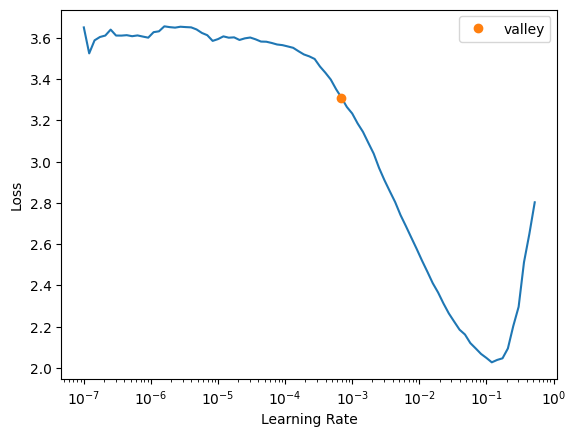

In [21]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 112MB/s]


SuggestedLRs(valley=0.0005754399462603033)

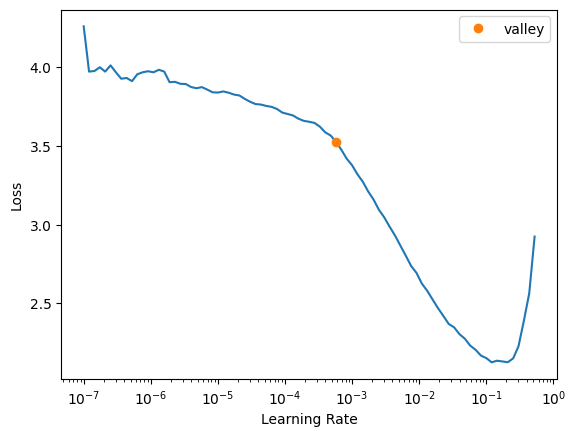

In [22]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.lr_find()

In [23]:
learn.fine_tune(4, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.591287,0.319861,0.106481,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.260332,0.136268,0.044630,00:47
1,0.120318,0.114759,0.036667,00:44
2,0.057008,0.102191,0.030926,00:47
3,0.024754,0.100533,0.031481,00:45


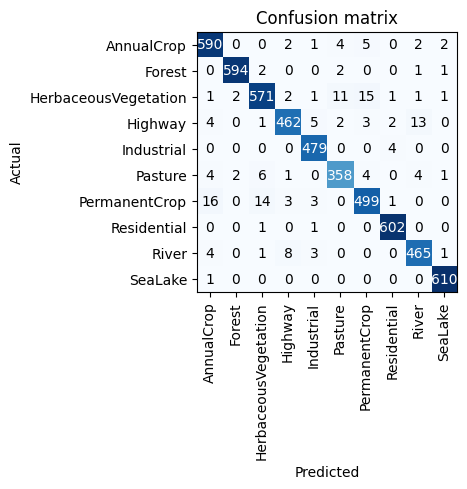

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

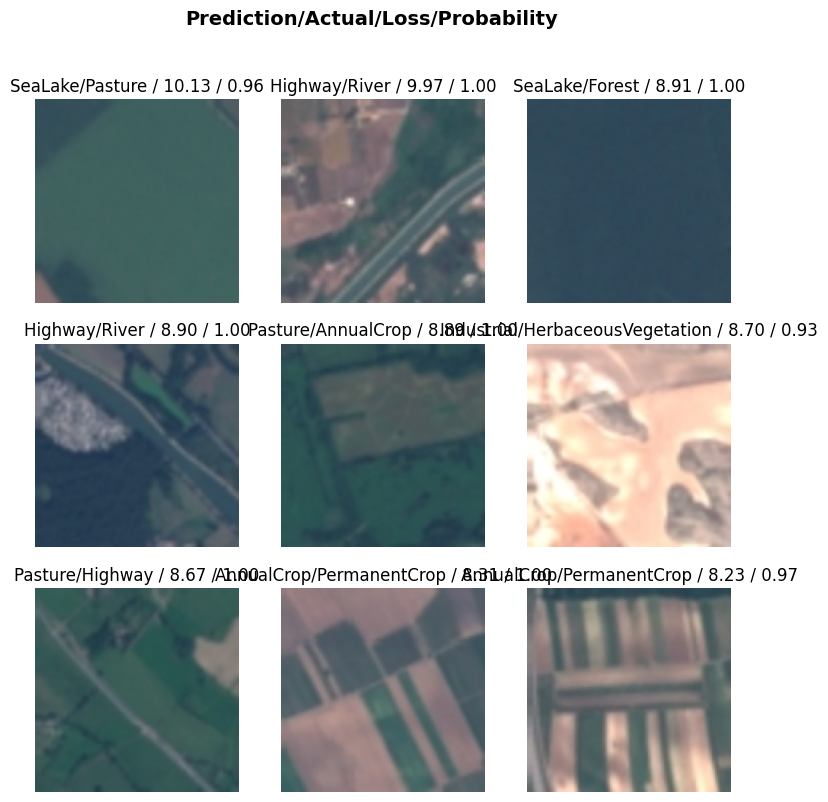

In [26]:
interp.plot_top_losses(9)